In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression


from video_processing.transform_coordinates import transform_coordinates
from video_processing.smooth_data import smooth_data
from video_processing.label_decision import label_decision
from video_processing.get_kinematic_features import *
from straight_walking_speed import plot_straight_walking_speed

In [ ]:
# loading data
animal = 'RRM030'
session = 'Day134'
data_root = r'D:\U19\data\RR\ARJ_raw' #Z:\Restaurant Row\Data\ARJ_raw
rse = RR_Expr(data_root)
filemap = rse.encode_to_filename(animal, session, ["RR_"])
bdf = RRBehaviorMat(
    animal, session, filemap, STAGE=1, cache_folder=None
).todf()

In [206]:
h5_folder = '/Users/yang/Documents/Wilbrecht_Lab/SLEAP_Analysis'

df = transform_coordinates(h5_folder)

In [207]:
df.describe()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y
count,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000
mean,197.236600,115.130751,197.045809,115.440501,196.554374,115.879194,195.866695,116.578054,297.666374,48.682059,295.797925,50.902230,292.421161,55.781071,288.969700,61.426586
std,37.810802,33.554196,36.938531,32.870174,36.506003,32.574270,37.756837,33.754085,34.350580,28.259247,31.200807,29.915182,25.451864,33.124993,20.449178,36.296596
min,60.893322,-136.341296,55.794579,-132.967207,47.423157,-14.887220,39.148140,-20.131970,141.408719,2.901488,142.357514,7.681706,148.806419,13.270311,156.080514,8.554547
25%,180.353523,96.408344,180.212418,99.312248,179.639923,100.388756,179.424866,103.200245,288.569892,32.591164,288.459402,33.260044,288.074693,33.161589,286.352515,33.612055
50%,199.272369,120.029198,198.890564,119.531059,196.735580,118.984100,196.684235,116.921814,299.842063,38.346508,297.779367,38.246806,295.058787,40.734873,291.575129,47.308479
75%,212.485802,136.016144,212.595848,135.370552,212.720238,132.656311,212.152992,131.246399,323.292982,53.682482,318.754442,59.231293,308.296814,70.460627,299.300061,81.472742
max,344.125275,236.195923,342.983795,242.423416,341.010468,244.463837,352.467377,244.844238,356.358706,281.964223,349.622115,278.829930,344.045810,174.457870,340.603791,179.449924


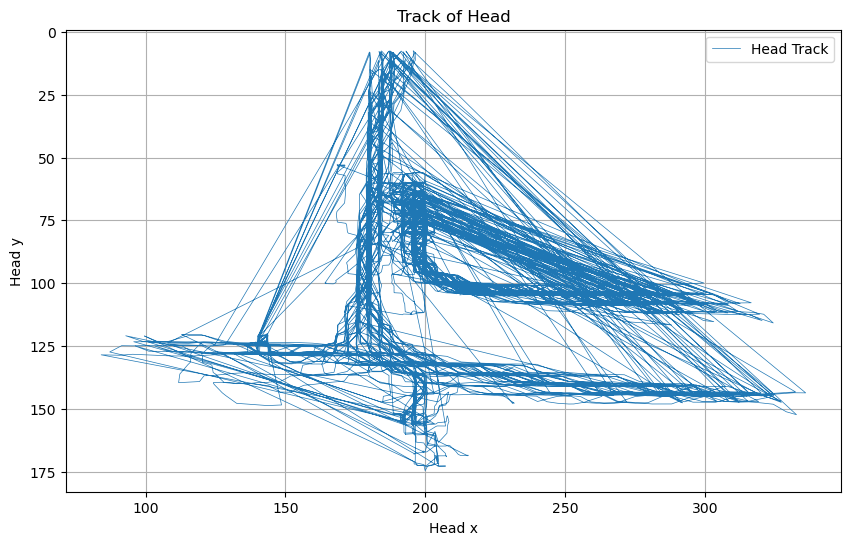

In [208]:
start_frame, stop_frame = 0000, 8000
head_x = df['Head x'][start_frame:stop_frame]
head_y = df['Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

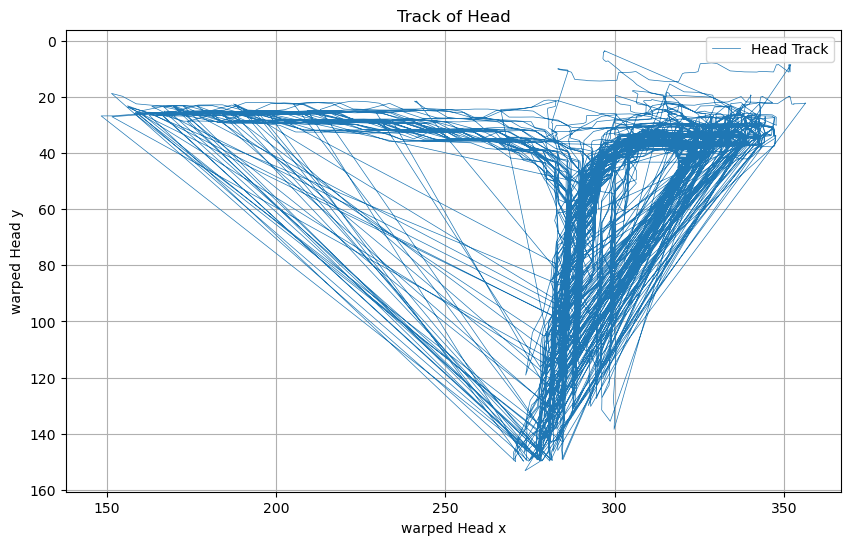

In [209]:
start_frame, stop_frame = 0000, 8000
head_x = df['warped Head x'][start_frame:stop_frame]
head_y = df['warped Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

In [210]:

'''
plot_df = df[1:400]
x = np.linspace(1, len(df), len(df))
sns.lineplot(data=plot_df, x=plot_df.index, y='Head yCoordinates')
plt.title('Head Y-Coordinate Over Time')
plt.xlabel('Frames')
plt.ylabel('Head Y-Coordinate')
#plt.xlim(0, )
plt.grid(True)
plt.show()
'''

"\nplot_df = df[1:400]\nx = np.linspace(1, len(df), len(df))\nsns.lineplot(data=plot_df, x=plot_df.index, y='Head yCoordinates')\nplt.title('Head Y-Coordinate Over Time')\nplt.xlabel('Frames')\nplt.ylabel('Head Y-Coordinate')\n#plt.xlim(0, )\nplt.grid(True)\nplt.show()\n"

In [211]:
'''
smoothed_data = {}
x = len(df)
grid = np.linspace(1, x, x)

for column in df.columns:
    y = df[column]
    spline = make_smoothing_spline(grid, y)
    smoothed_data[column] = spline(grid)

smoothed_df = pd.DataFrame(smoothed_data, index=df.index)

smoothed_df.head(20)
'''

'\nsmoothed_data = {}\nx = len(df)\ngrid = np.linspace(1, x, x)\n\nfor column in df.columns:\n    y = df[column]\n    spline = make_smoothing_spline(grid, y)\n    smoothed_data[column] = spline(grid)\n\nsmoothed_df = pd.DataFrame(smoothed_data, index=df.index)\n\nsmoothed_df.head(20)\n'

In [212]:
'''
#plt.figure(figsize=(15, 6))
sns.lineplot(data=smoothed_data['Head yCoordinates'][:400])
'''

"\n#plt.figure(figsize=(15, 6))\nsns.lineplot(data=smoothed_data['Head yCoordinates'][:400])\n"

In [213]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

In [204]:
# Smooth the data
columns_to_smooth = [
    'warped Head x', 'warped Head y',
    'warped Neck x', 'warped Neck y',
    'warped Torso x', 'warped Torso y',
    'warped Tailhead x', 'warped Tailhead y'
]

smoothed_df = smooth_data(df, columns_to_smooth)

In [214]:
smoothed_df.head()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y,Elapsed Time
0,280.655884,103.900528,287.523102,101.042740,299.204010,100.274368,311.114014,100.632660,288.795313,112.502517,291.434852,118.950001,292.439284,129.982656,291.695481,141.005628,0.000000
1,276.369812,104.058960,283.204681,103.355186,295.066620,100.617088,304.979675,102.976753,288.771558,108.408742,290.051113,114.193846,292.247792,125.226643,289.137712,135.266350,0.033333
2,271.853394,104.155304,276.696289,103.611404,288.414703,100.563377,300.044769,100.752357,288.701541,104.326269,289.291565,109.503944,292.516324,120.501065,291.891907,130.670079,0.066667
3,267.684143,104.538757,272.357605,103.712852,284.094879,100.099968,295.804962,99.863083,288.441322,100.395794,289.014365,105.121609,293.113780,116.111906,293.062162,126.716040,0.100000
4,263.628418,104.858932,268.296967,104.008766,280.046204,100.079124,291.656830,99.572060,288.210387,96.639830,288.917446,101.074858,293.361135,112.109098,293.529058,122.863666,0.133333


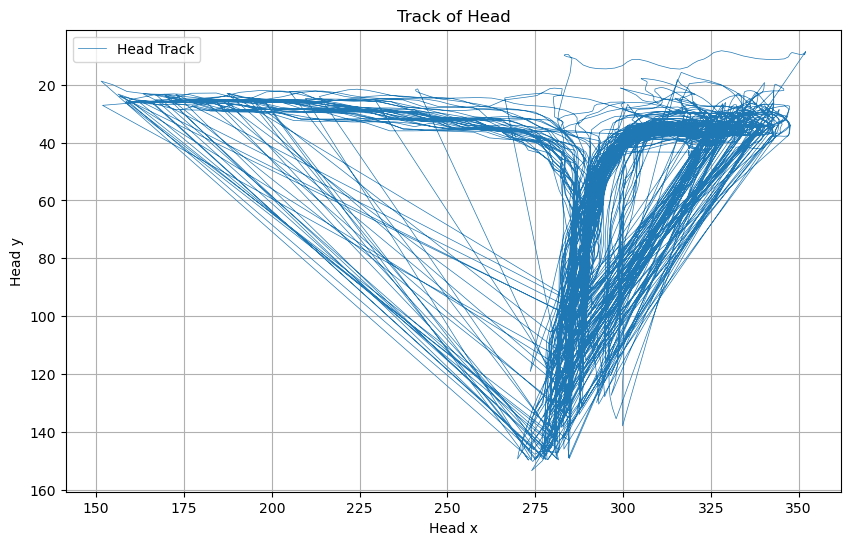

In [215]:
start_frame, stop_frame = 0000, 7000
head_x = smoothed_df['warped Head x'][start_frame:stop_frame]
head_y = smoothed_df['warped Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

In [216]:
labeled_df = label_decision(smoothed_df)

In [217]:
labeled_df.head(50)

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y,Elapsed Time,decision
0,280.655884,103.900528,287.523102,101.042740,299.204010,100.274368,311.114014,100.632660,288.795313,112.502517,291.434852,118.950001,292.439284,129.982656,291.695481,141.005628,0.000000,None
1,276.369812,104.058960,283.204681,103.355186,295.066620,100.617088,304.979675,102.976753,288.771558,108.408742,290.051113,114.193846,292.247792,125.226643,289.137712,135.266350,0.033333,None
2,271.853394,104.155304,276.696289,103.611404,288.414703,100.563377,300.044769,100.752357,288.701541,104.326269,289.291565,109.503944,292.516324,120.501065,291.891907,130.670079,0.066667,None
3,267.684143,104.538757,272.357605,103.712852,284.094879,100.099968,295.804962,99.863083,288.441322,100.395794,289.014365,105.121609,293.113780,116.111906,293.062162,126.716040,0.100000,None
4,263.628418,104.858932,268.296967,104.008766,280.046204,100.079124,291.656830,99.572060,288.210387,96.639830,288.917446,101.074858,293.361135,112.109098,293.529058,122.863666,0.133333,None
5,259.765656,104.859344,264.449432,104.145126,276.252563,100.421402,287.814941,100.012871,288.310735,92.923037,288.999265,97.191243,292.544933,108.305510,293.129625,119.255709,0.166667,None
6,255.411224,104.344215,260.163086,103.997505,272.005920,103.022644,284.026276,102.851257,288.920534,88.937019,289.466724,93.233378,290.444083,104.441823,289.921871,115.655737,0.200000,None
7,251.076599,103.864235,255.832138,103.849602,267.953796,103.137558,279.933716,102.965462,290.371624,84.369173,290.520657,89.012913,290.389009,100.305211,289.912320,111.881798,0.233333,None
8,244.340302,101.011040,251.333740,101.328163,263.554565,100.893196,275.382324,103.330658,292.765402,79.084618,291.939250,84.414279,292.454376,95.727588,289.623462,107.453148,0.266667,None
9,239.614761,100.888763,244.470016,101.196106,256.372101,100.475632,268.059326,100.580544,293.141629,73.704941,292.672481,79.488015,293.599929,90.778608,293.065780,100.902884,0.300000,None


In [218]:
# calculate velocity
bodyparts = [
    'Head',
    'Neck',
    'Torso',
    'Tailhead'
]

displacement_df = get_displacement(smoothed_df, bodyparts)
velocity_df = get_velocity(displacement_df, bodyparts, frame_rate=30)
acceleration_df = get_acceleration(velocity_df, bodyparts, frame_rate=30)

In [219]:
acceleration_df.head()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,...,Torso displacement,Tailhead displacement,Head velocity,Neck velocity,Torso velocity,Tailhead velocity,Head acceleration,Neck acceleration,Torso acceleration,Tailhead acceleration
0,280.655884,103.900528,287.523102,101.042740,299.204010,100.274368,311.114014,100.632660,288.795313,112.502517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3684.459702,4458.020968,4283.879629,5655.087345
1,276.369812,104.058960,283.204681,103.355186,295.066620,100.617088,304.979675,102.976753,288.771558,108.408742,...,4.759866,6.283430,122.815323,148.600699,142.795988,188.502911,-9.693810,-182.111616,-23.998242,-832.624173
2,271.853394,104.155304,276.696289,103.611404,288.414703,100.563377,300.044769,100.752357,288.701541,104.326269,...,4.733202,5.358292,122.492196,142.530312,141.996046,160.748772,-129.594150,-323.925652,-273.209600,-1111.240217
3,267.684143,104.538757,272.357605,103.712852,284.094879,100.099968,295.804962,99.863083,288.441322,100.395794,...,4.429635,4.123581,118.172391,131.732790,132.889060,123.707432,-158.420882,-308.863867,-377.272344,-218.714975
4,263.628418,104.858932,268.296967,104.008766,280.046204,100.079124,291.656830,99.572060,288.210387,96.639830,...,4.010444,3.880564,112.891695,121.437328,120.313315,116.416933,-40.417485,-147.090352,-108.241905,-225.508554


In [237]:
def straight_walking_speed(df, speed_threshold=500):
    """
    Extracts the straight walking speed (before T-entry) for each trial.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame with columns 'Elapsed Time', 'decision', and 'Head velocity'.
    
    Returns:
    list: A list of DataFrames, each containing the straight walking speed for one trial.
    """
    trials = []
    current_trial = []
    in_trial = False

    for index, row in df.iterrows():
        decision = row['decision']
        speed = row['Head velocity']

        if decision == 'T-entry' and in_trial:
            # End the current trial at T-entry
            if current_trial:
                trials.append(pd.DataFrame({'speed': current_trial}))
            current_trial = []
            in_trial = False

        if decision is None:
            in_trial = True
            if speed < speed_threshold:
                current_trial.append(speed)
                
    # Append the last trial if it was not followed by a T-entry
    if current_trial:
        trials.append(pd.DataFrame({'speed': current_trial}))

    return trials

In [238]:
def get_straight_walking_speed_profile(df, speed_threshold=500, length_threshold=12):
    """
    Extracts and normalizes the straight walking speed (before T-entry) for each trial.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame with columns 'Elapsed Time', 'decision', and 'Head velocity'.
    speed_threshold (float): The threshold above which speeds are considered outliers and are filtered out.
    target_length (int): The target length for normalization. Profiles shorter than this are excluded.
    
    Returns:
    pandas.DataFrame: A DataFrame where each row represents a normalized speed profile of a trial.
    """
    trials = []
    current_trial = []
    in_trial = False

    for index, row in df.iterrows():
        decision = row['decision']
        speed = row['Head velocity']

        if decision == 'T-entry' and in_trial:
            # End the current trial at T-entry
            if len(current_trial) >= length_threshold:
                # Use the last 12 speed values as the profile
                normalized_profile = current_trial[-length_threshold:]
                trials.append(normalized_profile)
            current_trial = []
            in_trial = False

        if decision is None:
            in_trial = True
            if speed < speed_threshold:
                current_trial.append(speed)

    # Append the last trial if it was not followed by a T-entry
    if len(current_trial) >= length_threshold:
        normalized_profile = current_trial[-length_threshold:]
        trials.append(normalized_profile)

    # Convert the list of lists to a DataFrame
    normalized_df = pd.DataFrame(trials, columns=[f'speed_{i+1}' for i in range(length_threshold)])

    return normalized_df


In [224]:
import pandas as pd
import numpy as np

def get_trial_profile(df, speed_threshold=500, length_threshold=12, coord_length=13):
    """
    Extracts the straight walking speed curve, track, average speed, and final decision for each trial.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the labeled data with decisions.
    speed_threshold (float): The threshold above which speeds are considered outliers and are filtered out.
    length_threshold (int): The target length for normalization of speed profiles. Profiles shorter than this are excluded.
    coord_length (int): The number of coordinate points to extract before each decision.
    
    Returns:
    pandas.DataFrame: A DataFrame with each row representing a trial, containing columns
                      for the trial number, speed profile, coordinate data, and the final decision.
    """
    trial_num = 0
    current_decision = None
    
    trials = []
    current_trial_speeds = []
    current_trial_coords = []

    for index, row in df.iterrows():
        y = row['warped Head y']
        decision = row['decision']
        speed = row['Head velocity']
        head_x = row['warped Head x']
        head_y = row['warped Head y']
        
        if decision is not None:
            current_decision = decision    
            
        if current_decision is not None and y > 90:  # End of current trial and start of a new trial
            trial_num += 1
            
            if len(current_trial_speeds) >= length_threshold and len(current_trial_coords) >= coord_length * 2:
                # Use the last `length_threshold` speed values and `coord_length` coordinates as the profile
                normalized_speeds = current_trial_speeds[-length_threshold:]
                normalized_coords = current_trial_coords[-(coord_length * 2):]
                x1, y1 = normalized_coords[0], normalized_coords[1]
                x2, y2 = normalized_coords[-2], normalized_coords[-1]
                distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                average_speed = distance / ((coord_length - 1) / 30)
                trials.append([trial_num, normalized_speeds, normalized_coords, current_decision, average_speed])
                
            current_trial_speeds = []
            current_trial_coords = []
            current_decision = None
            
        if decision is None:
            if speed < speed_threshold:
                current_trial_speeds.append(speed)
                current_trial_coords.append(head_x)
                current_trial_coords.append(head_y)
        
    # Handle the final trial if it doesn't end with y > 90
    if current_decision is not None and len(current_trial_speeds) >= length_threshold and len(current_trial_coords) >= coord_length * 2:
        normalized_speeds = current_trial_speeds[-length_threshold:]
        normalized_coords = current_trial_coords[-(coord_length * 2):]
        x1, y1 = normalized_coords[0], normalized_coords[1]
        x2, y2 = normalized_coords[-2], normalized_coords[-1]
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        average_speed = distance / ((coord_length - 1) / 30)
        trials.append([trial_num, normalized_speeds, normalized_coords, current_decision, average_speed])
    
    # Convert the list of trials to a DataFrame with appropriate column names
    speed_profiles = [t[1] for t in trials]
    coord_profiles = [t[2] for t in trials]
    decisions = [t[3] for t in trials]
    average_speeds = [t[4] for t in trials]
    trial_numbers = [t[0] for t in trials]

    # Flatten coordinate profiles into individual columns
    coord_columns = [f'x {i//2+1}' if i % 2 == 0 else f'y {i//2+1}' for i in range(coord_length * 2)]
    
    profiles_df = pd.DataFrame(speed_profiles, columns=[f'speed {i+1}' for i in range(length_threshold)])
    coords_df = pd.DataFrame(coord_profiles, columns=coord_columns)
    
    profiles_df['trial num'] = trial_numbers
    profiles_df['final decision'] = decisions
    profiles_df['average speed'] = average_speeds
    final_df = pd.concat([profiles_df, coords_df], axis=1)

    return final_df

In [225]:
straight_walking_speed_profiles = get_trial_profile(acceleration_df)
#plot_straight_walking_speed(straight_walking_speed_list[:50])


In [240]:
straight_walking_speed_profiles.head()

,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,...,x 10,y 10,x 11,y 11,x 12,y 12,x 13,y 13,slope,intercept
0,118.172391,112.891695,111.544446,120.971772,143.783851,174.043162,161.784506,167.708644,144.095988,137.334203,...,290.872113,63.590099,291.641909,59.077480,293.614674,54.404176,294.696828,49.354022,-0.107284,299.242600
1,201.463604,214.246878,214.751108,210.885835,214.590930,191.792241,199.110600,206.619845,198.568744,180.278754,...,290.715977,64.316293,291.022928,58.314846,291.453926,52.799929,294.595932,48.049626,-0.141847,299.979205
2,136.436455,146.480931,153.865422,146.306517,156.223729,184.209777,190.171600,175.655794,170.903267,166.627958,...,289.701274,67.943991,290.094347,62.403652,290.729780,56.783407,291.893739,51.206846,0.000704,290.000317
3,162.071630,164.863613,168.503364,173.330464,180.049383,175.537165,172.612825,170.873044,170.907244,171.045484,...,290.553602,63.668035,291.903475,58.128619,293.820664,52.858741,295.278769,48.147873,-0.162700,301.815950
4,140.477292,146.533031,156.169417,167.232814,175.919222,179.830727,183.283620,184.310863,181.317053,173.542792,...,289.731030,63.058513,290.087594,57.284753,290.531232,51.954421,292.020349,47.193706,-0.040858,292.366102


In [227]:
'''
# calculate average straight walking speed of each trial
trial_data_list = []
trial_num = 0
record_trial = False
T_entry = False
Acc = False
Rej = False
quit = False
start_index = 0
walking_speed = np.NaN

for index, row in smoothed_df.iterrows():
    x = row['Head x']
    y = row['Head y']
    if Acc and y > 46: # Trial end with accept
        record_trial = False
    if record_trial: # in a trial          
        if (not T_entry) and y < 46:
            T_entry = True # enter T-junction
            
            # Calculate the straight walking metrics
            x0 = smoothed_df.iloc[start_index]['Head x']
            y0 = smoothed_df.iloc[start_index]['Head y']
            dist = np.sqrt((x - x0)**2 + (y - y0)**2)
            walking_speed = dist / (len(range(start_index, index)) + 1)
            
        # identify animal decision
        if T_entry:
            if y > 46:
                record_trial = False # trial end with no decision (mistakenly)
            
            if (not Acc) and (not Rej):
                if x > 309:
                    Acc = True # Accept the offer
                elif x < 282:
                    Rej = True 
                    record_trial = False # Trial end with reject
            elif Acc:
                if x < 282:
                    quit = True
                    record_trial = False # Trial end with quit
        
        #segment_head_x = analysis.loc[index - 12:index, 'Head xCoordinates'].reset_index(drop=True)
        #straight_walking_head_x[f'Track {seg_num}'] = segment_head_x
        #segment = analysis.loc[start_index:index]
        #straight_walking = pd.concat([straight_walking, segment])
        #in_segment = False
        #start_index = None
    else:
        if y > 90: # The start of each trial 
                        
            # Record last trial's decision
            decision = 'quit' if quit else 'Acc' if Acc else 'Rej' if Rej else np.NaN
            trial_data_list.append({'trial_num': trial_num, 'decision': decision, 'walking speed': walking_speed})
            
            
            # reset all flags
            record_trial = True
            T_entry = False
            Acc = False
            Rej = False
            quit = False
            trial_num += 1
            
            start_index = index

trial_data = pd.DataFrame(trial_data_list)
'''

"\n# calculate average straight walking speed of each trial\ntrial_data_list = []\ntrial_num = 0\nrecord_trial = False\nT_entry = False\nAcc = False\nRej = False\nquit = False\nstart_index = 0\nwalking_speed = np.NaN\n\nfor index, row in smoothed_df.iterrows():\n    x = row['Head x']\n    y = row['Head y']\n    if Acc and y > 46: # Trial end with accept\n        record_trial = False\n    if record_trial: # in a trial          \n        if (not T_entry) and y < 46:\n            T_entry = True # enter T-junction\n            \n            # Calculate the straight walking metrics\n            x0 = smoothed_df.iloc[start_index]['Head x']\n            y0 = smoothed_df.iloc[start_index]['Head y']\n            dist = np.sqrt((x - x0)**2 + (y - y0)**2)\n            walking_speed = dist / (len(range(start_index, index)) + 1)\n            \n        # identify animal decision\n        if T_entry:\n            if y > 46:\n                record_trial = False # trial end with no decision (mistakenl

In [228]:
# plot the coorelation between decision and speed
def plot_decision_composition(df, column, window_size=50, step_size=10):
    """
    Plots the composition of different decisions in different average speed intervals using a line graph with MSE.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing 'average_speed' and 'final_decision' columns.
    window_size (int): The size of the speed window.
    step_size (int): The step size for the sliding window.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Define speed intervals using a sliding window
    max_speed = df_copy[column].max()
    min_speed = df_copy[column].min()
    speed_intervals = np.arange(min_speed, max_speed + step_size, step_size)

    proportions = []
    
    for i in range(len(speed_intervals) - 1):
        lower_bound = speed_intervals[i]
        upper_bound = lower_bound + window_size
        interval_data = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] < upper_bound)]
        
        if len(interval_data) > 0:
            interval_composition = interval_data['final decision'].value_counts(normalize=True)
            proportions.append(interval_composition)
            
        else:
            proportions.append(pd.Series())
    # Create a DataFrame for the proportions
    proportions_df = pd.DataFrame(proportions, index=speed_intervals[:-1])

    # Plot the line graph with MSE error bars
    plt.figure(figsize=(10, 6))
    for decision in proportions_df.columns:
        plt.errorbar(proportions_df.index, proportions_df[decision], label=decision)
    
    plt.xlabel(column)
    plt.ylabel('Proportion of Decisions')
    plt.title('Composition of Decisions in Different Average Speed Intervals')
    plt.legend(title='Decision')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

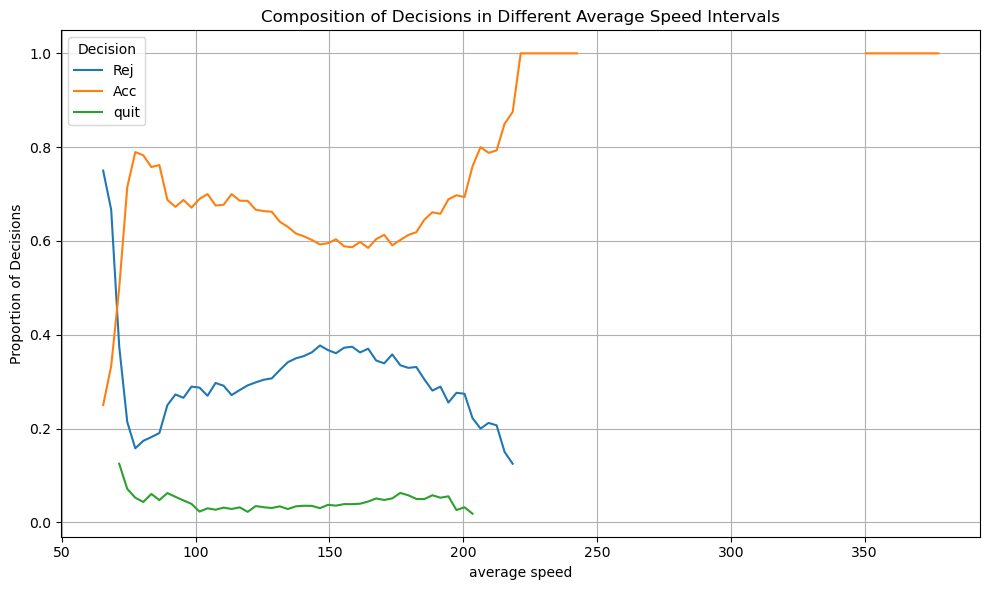

In [248]:
plot_decision_composition(straight_walking_speed_profiles, column='average speed', window_size=30, step_size=3)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


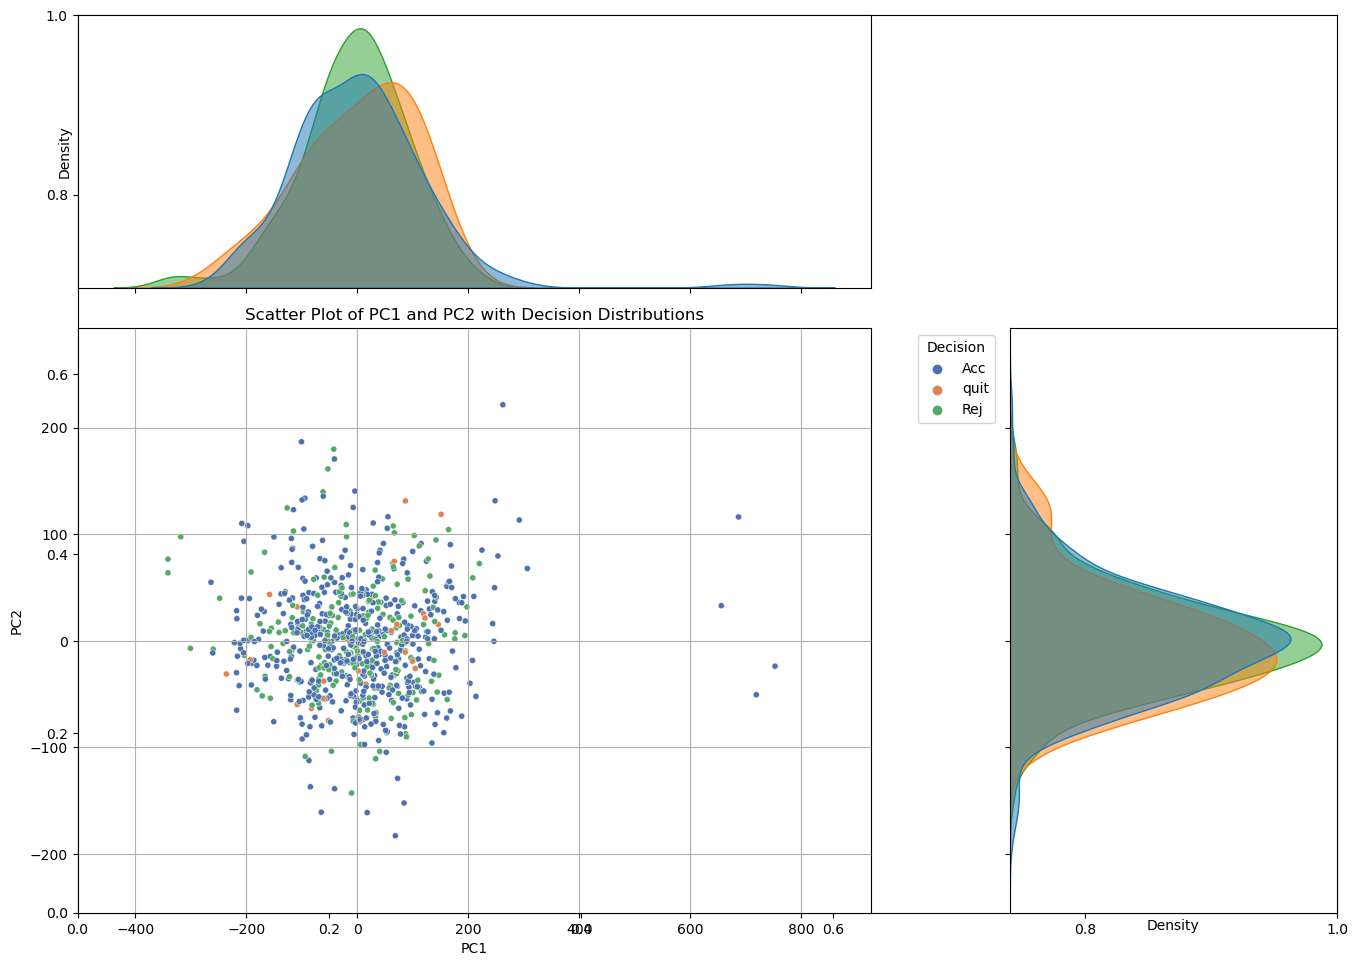

In [244]:
pca_columns=[f'speed {i+1}' for i in range(12)]

"""
Performs PCA on the coordinate columns of the DataFrame and adds the principal components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in PCA.
n_components (int): Number of principal components to extract.

Returns:
pandas.DataFrame: The DataFrame with the principal components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(coords_data)

# Create a DataFrame for the principal components
pc_columns = [f'PC{i+1}' for i in range(2)]
pc_df = pd.DataFrame(principal_components, columns=pc_columns)

# Add the principal components to the original DataFrame
speed_pca = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), pc_df.reset_index(drop=True)], axis=1)


"""
Plots the PCA results, including a scatter plot of PC1 and PC2 and the variance explained by each PC.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with the principal components.
pca (PCA): The fitted PCA object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# New Code: Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 10))

# New Code: Create gridspec for layout
from matplotlib.gridspec import GridSpec
gs = GridSpec(3, 3, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# New Code: Scatter plot of PC1 and PC2
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='final decision', palette='deep', s=20, ax=main_ax)
main_ax.set_xlabel('PC1')
main_ax.set_ylabel('PC2')
main_ax.set_title('Scatter Plot of PC1 and PC2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# New Code: KDE plot for the distribution of different decisions' points along PC1
sns.kdeplot(data=speed_pca, x='PC1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# New Code: KDE plot for the distribution of different decisions' points along PC2
sns.kdeplot(data=speed_pca, y='PC2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

PC1 = 0.132 * speed 1 + 0.173 * speed 2 + 0.210 * speed 3 + 0.236 * speed 4 + 0.235 * speed 5 + 0.280 * speed 6 + 0.338 * speed 7 + 0.355 * speed 8 + 0.353 * speed 9 + 0.360 * speed 10 + 0.355 * speed 11 + 0.316 * speed 12


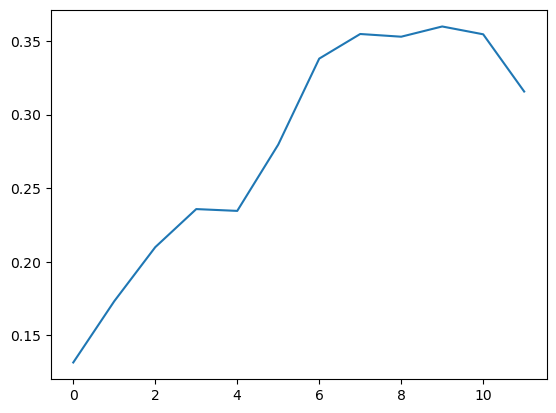

In [245]:
# Output the expression of PC1
pc1_expression = " + ".join([f"{coef:.3f} * {col}" for coef, col in zip(pca.components_[0], pca_columns)])
print(f"PC1 = {pc1_expression}")
plt.plot(pca.components_[0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


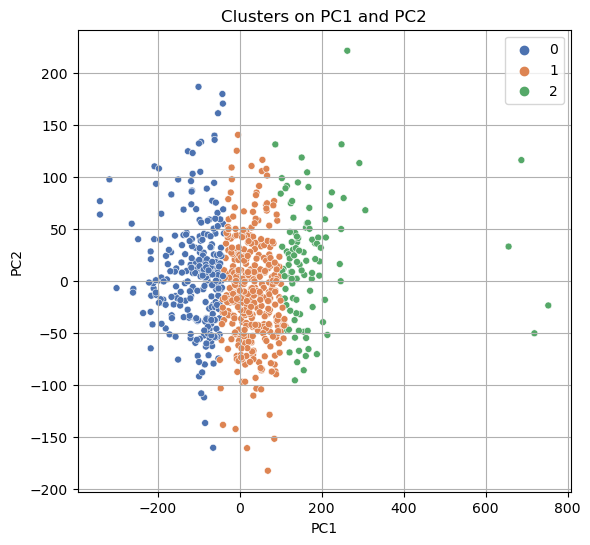

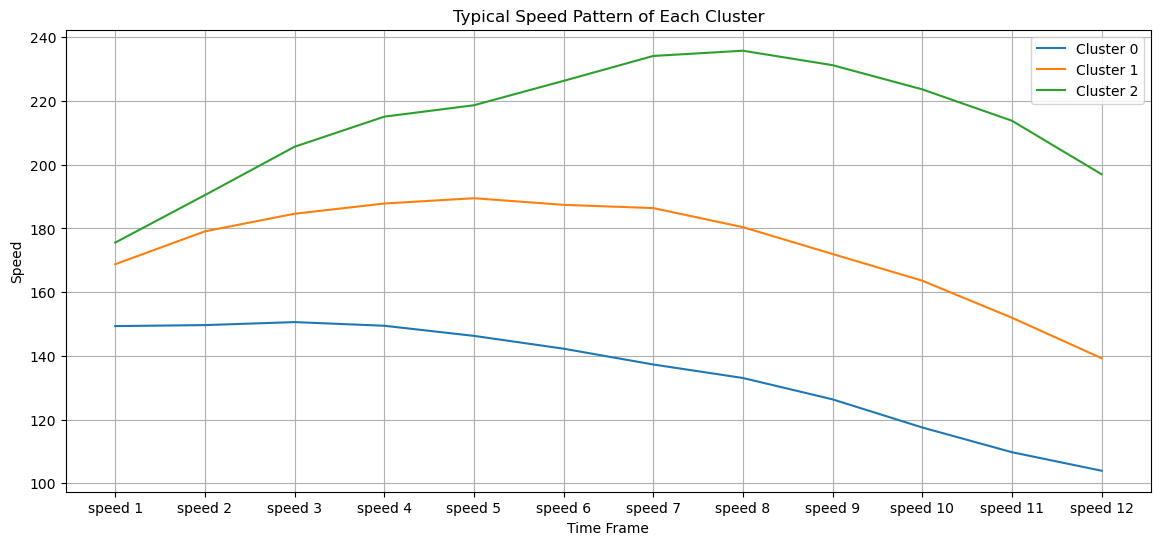

In [232]:

"""
Clusters the PCA-transformed data using K-means and adds cluster labels to the DataFrame.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components.
n_clusters (int): The number of clusters to form.

Returns:
pandas.DataFrame: The DataFrame with cluster labels added.
"""
# Extract the PCA columns
pca_columns = ['PC1', 'PC2']
pca_data = speed_pca[pca_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_data)

# Add cluster labels to the DataFrame
speed_pca['Cluster'] = kmeans.labels_


"""
Plots the PCA results with clusters and decision labels.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components and cluster labels.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Scatter plot of PC1 and PC2 with clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
clusters = speed_pca['Cluster'].unique()
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='Cluster', palette='deep', s=25)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the typical speed pattern of each cluster
"""
Plots the typical speed pattern for each cluster.

Parameters:
speed_pca (pandas.DataFrame): The DataFrame with speed profiles and cluster labels.
"""
plt.figure(figsize=(14, 6))

for cluster in clusters:
    cluster_data = speed_pca[speed_pca['Cluster'] == cluster]
    mean_speed_pattern = cluster_data[[f'speed {i+1}' for i in range(12)]].mean()
    plt.plot(mean_speed_pattern, label=f'Cluster {cluster}')

plt.xlabel('Time Frame')
plt.ylabel('Speed')
plt.title('Typical Speed Pattern of Each Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [233]:
# Function to calculate the slope and intercept for each trial using sklearn
def calculate_slope_intercept(df):
    slopes = []
    intercepts = []

    for index, row in df.iterrows():
        x_coords = row[[f'x {i+1}' for i in range(13)]].values.reshape(-1, 1)
        y_coords = row[[f'y {i+1}' for i in range(13)]].values.reshape(-1, 1)
        
        # Perform linear regression using sklearn
        reg = LinearRegression().fit(y_coords, x_coords)
        slope = reg.coef_[0][0]
        intercept = reg.intercept_[0]
        
        slopes.append(slope)
        intercepts.append(intercept)
    
    df['slope'] = slopes
    df['intercept'] = intercepts

    return df

# Apply the function to the DataFrame
straight_walking_speed_profiles = calculate_slope_intercept(straight_walking_speed_profiles)

In [234]:
straight_walking_speed_profiles.describe()

,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,...,x 10,y 10,x 11,y 11,x 12,y 12,x 13,y 13,slope,intercept
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,...,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,162.840450,170.262075,175.536028,178.080627,178.305468,176.914515,175.752836,171.467304,164.199697,155.777054,...,293.049378,61.945286,293.845492,56.895129,294.665172,52.213117,295.473577,47.917292,-0.105234,299.755350
std,32.083198,32.868696,33.482424,34.961590,35.192056,37.102546,41.848780,43.335848,43.758247,45.365878,...,4.299076,5.344106,4.489556,3.987273,4.789698,2.635850,5.170110,1.618209,0.074581,7.059870
min,40.840283,63.160491,63.201864,39.344619,45.352688,61.795080,22.832554,35.659196,41.102210,30.871624,...,279.337452,50.668047,279.469086,49.516733,279.657895,47.068737,278.819793,46.005954,-0.309306,269.273273
25%,144.079114,148.580488,154.483729,155.169400,153.672219,149.846818,147.265878,143.862082,137.222839,127.214864,...,289.878860,58.573115,290.766551,54.213530,291.830577,50.286586,292.911163,46.588019,-0.154671,295.169332
50%,163.260358,171.242667,174.823952,176.339625,177.981706,175.851630,174.592639,169.959056,162.860568,155.055851,...,292.871017,61.636740,293.724287,56.563903,294.932330,51.856009,295.945478,47.419143,-0.107257,300.407516
75%,181.069534,191.898709,197.098007,201.069733,202.525318,202.564751,199.110600,197.631387,189.671866,180.175618,...,295.933490,64.524055,296.815152,58.639399,298.197704,53.572707,299.243379,49.111820,-0.055050,304.277438
max,382.747012,386.459172,399.903013,397.917036,343.024445,364.544468,444.553708,454.314979,456.200657,448.583272,...,303.894867,102.047087,304.569967,88.791901,304.888721,73.069206,305.270193,59.388817,0.190867,318.517576


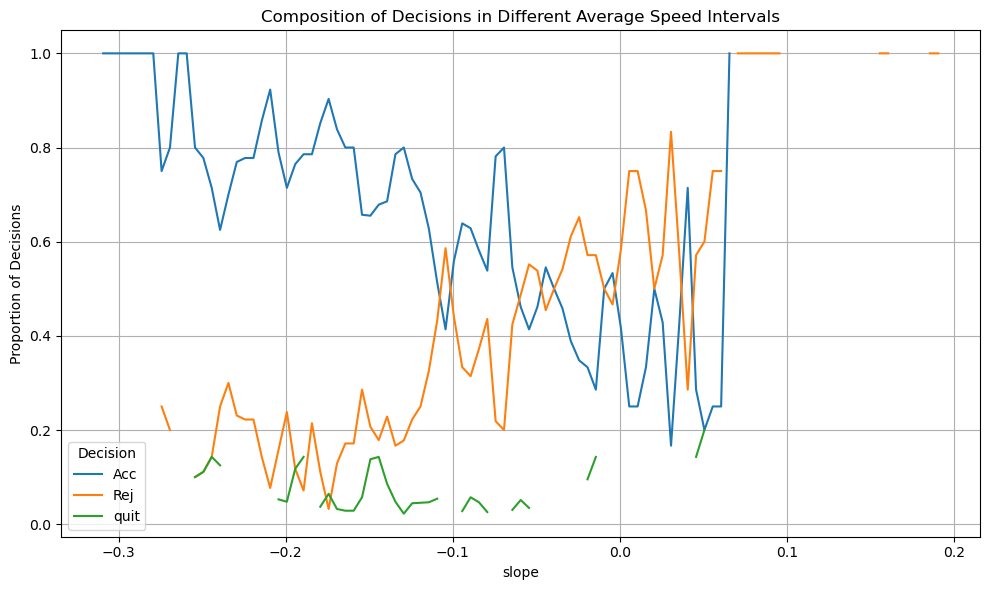

In [235]:
plot_decision_composition(straight_walking_speed_profiles, column='slope', window_size=0.01, step_size=0.005)

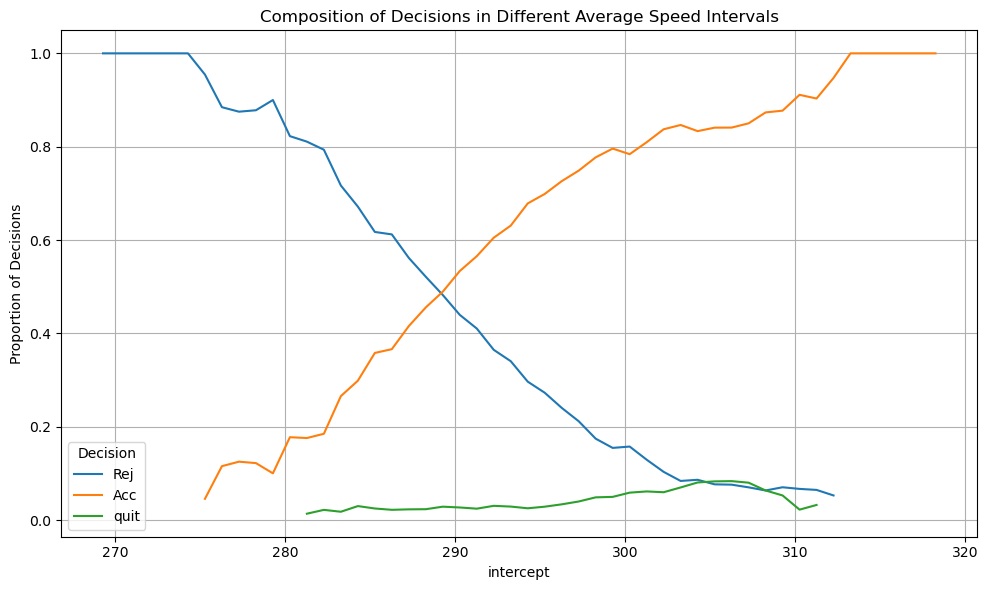

In [236]:
plot_decision_composition(straight_walking_speed_profiles, column='intercept', window_size=10, step_size=1)